# 7/2
getting the pb to work with casa possibly...

### So the gist of it is, I have to set the primary beam with something called the vpmanager in casa

### and suprise suprise, the only docs are hidden behind a NRAO login wall that for some reason, having a NRAO account doesn't help. At least I can just do `vp.` while in casa and I can see it's attributes, including...



# `vp.setpbsetimage`

In [3]:
#Truly wonderful. Let's see if I can get it to work. From the "docs" I could find, it looks like I have to input

Input Parameters:<br>
    *    telescope        Which telescope in the MS will use this vp/pb? VLA 
        othertelescope   If telescope=='OTHER', specify name here <br>
        dopb             Should we apply the vp/pb to this telescope's data? true<br> 
        realimage        Real part of vp as an image <br>
        imagimage        Imaginary part of vp as an image<br> 
        compleximage     complex vp as an image of complex numbers; if specified realimage and imagimage are ignored 
        antnames         antenna names for which this pattern is valid; default is all antennas * <br>


In [4]:
from pyuvdata import UVData #for opening the data in "compleximage"
uv = UVData()

path = '/lustre/aoc/projects/hera/jaguirre/PolarizedMosaics/'
day1 = "2458098_sliced/"
filename = 'zen.010601_011009.calibrated.HH.uvfits'


uv.read(path+day1+filename)
type()

In [5]:
#Yes an error while opening up the data... fun
print('No module named casacore')

#I just ran:
#!conda install -c conda-forge casacore

No module named casacore


# Wow I literally used conda AND the git repo to download it and I got an error saying that I couldn't download casacare because...


# RuntimeError: Your casacore version is too old. Minimum is 3.1.1, you have 2.4.1

In [6]:
#I'm just going to convert the MS to something else... Just kidding the pip installed work

#lets look at shape of data array

# 7/3
Another day and I'm already getting progress... So I ran the following code in casa

`vp.setpbimage(telescope='OTHER', othertelescope='HERA',compleximage='/lustre/aoc/projects/hera/gtucker/repositories/team_poloraziation/muellerbeam.fits')`

So I saved this table and am trying to use it in casa but I get the error that the fits image is not readable... maybe I should turn it into a casa image and then see if that will work...

In [22]:
#lets import the muellerbeam fits file and check out its size... should be (nx,ny,4,1) ? but its a 4 x 4 matrix...
from astropy.io import fits

hdu = fits.open('muellerbeam.fits')

#hdu[0].data = hdu[0].data.T
hdu[0].shape

(4, 4, 1, 512, 512)

In [9]:
hdu.writeto('reformated_muelller_beam.fits',overwrite=True)

In [10]:
hdu = fits.open('reformated_muelller_beam.fits')
hdu[0].data.shape

#Going to see how I can turn this into a (512,512,1,4) array and keep all the same information...

(512, 512, 1, 4, 4)

# 7/4

# Fortunately for me, I did something like this last summer

In [23]:
#Lets save the following 16 fits files
iarr = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
jarr = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
nu0 = 150 
mueller_matrixes = []

filenames = []
for i,j in zip(iarr,jarr):
    mueller_matrixes.append(fits.PrimaryHDU(data=hdu[0].data[i][j][0][:][:],header=hdu[0].header))
    filenames.append('{}{}_{}MHz.fits'.format(i,j,nu0))

for m,files in zip(range(len(mueller_matrixes)),filenames):        
    mueller_matrixes[m].writeto(files,overwrite=True)

I am going to use these four polarizations to create a nx, ny, 1, 4 matrix. Right now these are just


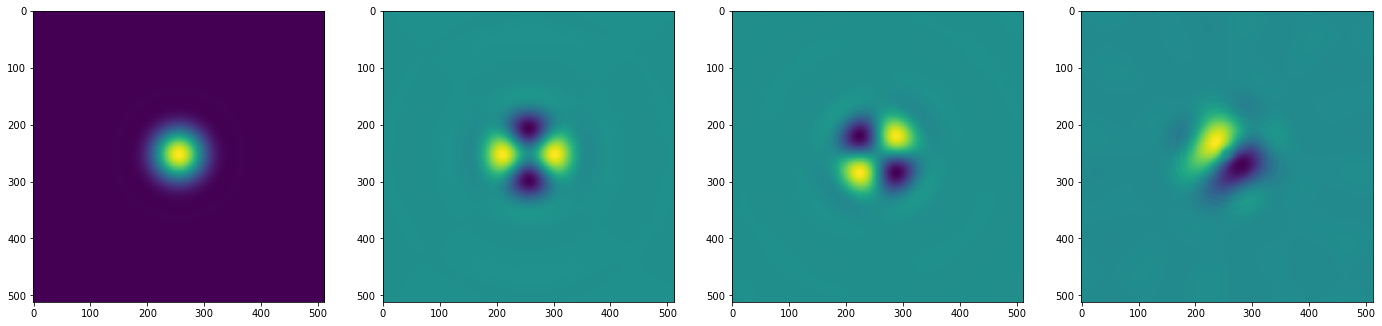

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(24,18),nrows=1, ncols=4, sharex=True,sharey=False)#subplot_kw={'projection': wcs})

for i in range(4):
    axes[i].imshow(mueller_matrixes[i].data)
print('I am going to use these four polarizations to create a nx, ny, 1, 4 matrix. Right now these are \
just 4 (nx,ny) matrices. I will fix it later but I amg going to go to sleep for now. Happy 4th')

In [ ]:
# Another function! I have to use im.setvp() in order to set the voltage  pattern model